<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 9. Shallow-water equations
## Analytical solutions for dam break
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [2]:
import numpy as np
import matplotlib.pyplot as plt

----
### Ritter solution

Dam break on dry domain without friction. Also known as *Ritter's solution$^1$*.

- **Initial condition** for $h(x,t=0)$ [m] and $u(x,t=0)$ [m/s]:

$$
h_0(x) = \left\{ 
\begin{array}{rl}
h_l & \mbox{for } 0 \le x \le a \\
0   & \mbox{for } x \gt a
\end{array}
\right.
$$
$h_l$ [m] initial water height in dam, 
$a$ [m], initial location of dam, and
$u(x)=0$ [m/s] initial velocity.

- **Transient solution** or $h(x,t>0)$ [m] and $u(x,t>0)$ [m/s]:

$$
\begin{array}{rcl}
h(x,t) &=& \frac{\left( 2 \sqrt{g h_l} - \frac{x-a}{t}   \right)^2}{9g} \\
u(x,t) &=& \frac{2}{3} \left( \sqrt{g h_l} + \frac{x-a}{t} \right)
\end{array}
$$

In [3]:
hl = 2      # initial water height left [m]
a  = 0      # break point [m]
g  = 9.81   # grav. acceleration [m/s^2]

In [4]:
def hInit(x,a,hl):
    hInit = np.zeros(len(x))
    for i in range(len(hInit)):
        if (x[i] <= a):
            hInit[i] = hl
        else:
            hInit[i] = 0
    return hInit

def hTime(x,t,g,hl,a):
    hTime = np.zeros(len(x))
     
    for i in range(len(hTime)):
        xx = x[i]/(t*np.sqrt(g*hl))
        if (xx <= -1):
            hTime[i] = hl
        elif (xx > -1 and xx < 2):
            hTime[i] = (2*np.sqrt(g*hl)-(x[i]-a)/t)**2 / (9*g)
        else:
            hTime[i] = 0
    return hTime

In [5]:
x = np.linspace(-50,50,101)

h0   = hInit(x,a,hl)
h3   = hTime(x,3,g,hl,a)
h5   = hTime(x,5,g,hl,a)
h20  = hTime(x,20,g,hl,a)
h100 = hTime(x,100,g,hl,a)

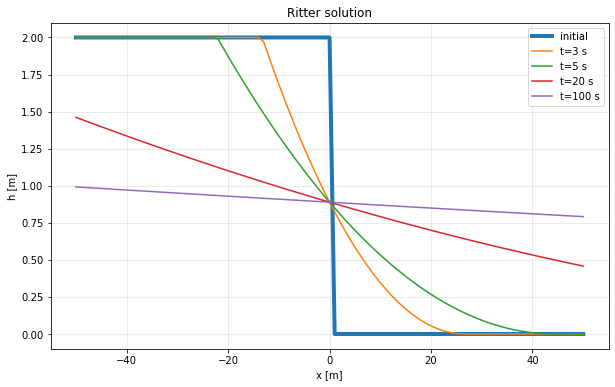

In [6]:
plt.figure(figsize=(10,6))
plt.title('Ritter solution')
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.grid(alpha=0.3)

plt.plot(x,h0,linewidth=4,label='initial')
plt.plot(x,h3,label='t=3 s')
plt.plot(x,h5,label='t=5 s')
plt.plot(x,h20,label='t=20 s')
plt.plot(x,h100,label='t=100 s')
plt.legend()

----
### Stoker's solution

Dam break on wet domain without friction. Also known as *Stoker's solution$^2$*.

- **Initial condition** for $h(x,t=0)$ [m] and $u(x,t=0)$ [m/s]:

$$
h(x) = \left\{ 
\begin{array}{rr}
h_l & \mbox{for } 0 \le x \le a \\
h_r & \mbox{for } a \le x \le L
\end{array}
\right.
$$
and $h_l \ge h_r$, $u(x)=0$ m/s.

- **Transient solution** or $h(x,t>0)$ [m] and $u(x,t>0)$ [m/s]:

$$
h(x,t) = \left\{ 
\begin{array}{rr}
h_l & x \le x_A(t) \\
\frac{4}{9g} \left( \sqrt{g h_l} - \frac{x}{2t}  \right)^2 & x_A(t) < x \le x_B(t) \\
\frac{c_m^2}{g} & x_B(t) < x \le x_C(t) \\
h_r & x > x_C(t)
\end{array}
\right.
$$
$$
u(x,t) = \left\{ 
\begin{array}{rr}
\end{array}
\right.
$$

In [7]:
L  = 50      # length of domain [m]
T  = 6       # time [s]
hl = 3  # initial water height left [m]
hr = 1  # initial water height right [m]
x0 = 0      # break point [m]
g  = 9.81   # grav. acceleration [m/s^2]

In [8]:
def cal_xA(t,x0,g,hl):
    xA = x0 - t*np.sqrt(g*hl)
    return xA

def cal_xB(t,x0,g,hl,cm):
    xB = x0 + t*(2*np.sqrt(g*hl)-3*cm)
    return xB

def cal_xC(t,x0,g,hl,hr,cm):
    xC = x0 + t*(2*cm**2*(np.sqrt(g*hl)-cm))/(cm**2-g*hr)
    return xC

def hInit(x,x0,hl,hr):
    hInit = np.zeros(len(x))
    for i in range(len(hInit)):
        if (x[i] < x0):
            hInit[i] = hl
        else:
            hInit[i] = hr
    return hInit
         
    
def hTime(x,t,g,x0,hl,hr,cm):
    hTime = np.zeros(len(x))
    xA = cal_xA(t,x0,g,hl)
    xB = cal_xB(t,x0,g,hl,cm)
    xC = cal_xC(t,x0,g,hl,hr,cm)
    print('xA: ',xA,' xB: ',xB,' xC: ',xC)
    for i in range(len(hTime)):
        if (x[i] <= xA):
            hTime[i] = hl
        elif (x[i] > xA and x[i] <= xB):
            hTime[i] = 4/(9*g)*(np.sqrt(g*hl)-(x[i]/2/t))**2
            #hTime[i] = (2*np.sqrt(g*hl)-((x[i]-x0)/t))**2 / (9*g)
        elif (x[i] > xB and x[i] <= xC):
            hTime[i] = cm**2/g
        else:
            hTime[i] = hr
    return hTime

In [9]:
c0 = g**3*hr**3
c1 = 0.
c2 = -8*g**2*hr*hl + g**2*hr**2 - 2*g**2*hr**2
c3 = 0.
c4 = 16*g*hr*np.sqrt(g*hl) -2*g*hr + g*hr
c5 = 0.
c6 = -8*g*hr + 1
p = [c0,c1,c2,c3,c4,c5,c6]

cm = np.roots(p)
print(cm)
pp = np.poly1d(p)
print(pp)
for i in range(len(cm)):
    print(i,pp(cm[i]))

hm = 0.5*(hl+hr)
cm[0] = np.sqrt(g*hm)
print(cm[0])

[-1.46690902  1.46690902 -0.48238138 -0.4048532   0.48238138  0.4048532 ]
       6        4         2
944.1 x - 2406 x + 841.7 x - 77.48
0 7.148059921746608e-12
1 1.9610979506978765e-12
2 2.1316282072803006e-13
3 1.4210854715202004e-13
4 8.526512829121202e-14
5 7.105427357601002e-14
4.4294469180700204


In [10]:
x = np.linspace(-L,L,101)
t = np.linspace(0,T,5)

h0  = hInit(x,x0,hl,hr)
h3  = hTime(x,3,g,x0,hl,hr,cm[0])
h5  = hTime(x,5,g,x0,hl,hr,cm[0])
h20 = hTime(x,20,g,x0,hl,hr,cm[0])

xA:  -16.274827188022613  xB:  -7.3153678865849585  xC:  11.945945735250206
xA:  -27.124711980037688  xB:  -12.19227981097493  xC:  19.909909558750343
xA:  -108.49884792015075  xB:  -48.76911924389972  xC:  79.63963823500137


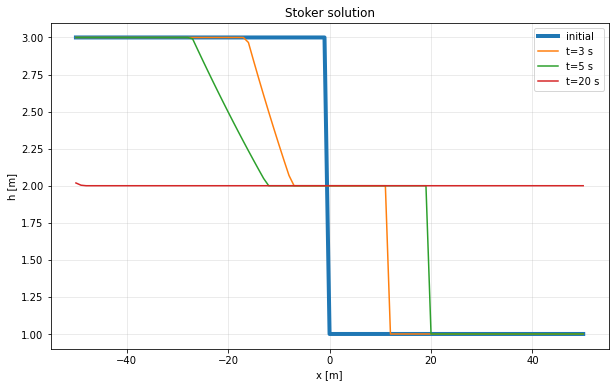

In [11]:
plt.figure(figsize=(10,6))
plt.title('Stoker solution')
plt.xlabel('x [m]')
plt.ylabel('h [m]')
plt.grid(alpha=0.3)
plt.plot(x,h0,linewidth=4,label='initial')
plt.plot(x,h3,label='t=3 s')
plt.plot(x,h5,label='t=5 s')
plt.plot(x,h20,label='t=20 s')
plt.legend()

In [ ]:
p = [-1,0,1]
xroots = np.roots(p)
print(xroots)

----
## Literature

1. A. Ritter. Die Fortpflanzung der Wasserwellen. Zeitschrift des Vereins Deutscher Ingenieure, 36:947–954, 1892.
2. J. J. Stoker. Water Waves: The Mathematical Theory with Applications. Pure and Applied Mathematics. Interscience Publishers, New York, USA,
 1957.

... done